# <center> INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS

## <center> BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

- Data preprocessing is a crucial step in machine learning that involves cleaning and transforming raw data into a format suitable for training models. It directly impacts the performance of your machine learning models. Here are the key data preprocessing steps in machine learning:

- ***Data Collection:***
    - Data is available in csv format
    
- ***Handle missing values***
    - From the Exploratory Data Analysis We can see that their is no Missing values present in the any columns.


- ***Data Exploration:***
    - Used X as independent and y as independent column
    - from the EDA section we found that no constant columns are present in the dataset

- ***Feature Scaling:***
    - Standardize or normalize numerical features to bring them to a similar scale. This is important for algorithms that are sensitive to the scale of input features 

- ***Feature Encoding:***
    - Convert categorical variables into a numerical format suitable for machine learning models.
    - One-hot encoding, label encoding, and ordinal encoding are common techniques.

- ***Handling Imbalanced Data:***

    - Address class imbalance if present, especially in classification problems. Techniques include oversampling, undersampling, 

- ***Handling Outliers:***

    - Identify and handle outliers in the data. Outliers can adversely affect the performance of some machine learning models.

- ***Data Splitting:***

    - Split the dataset into training and testing sets. This allows you to train the model on one subset and evaluate its performance on another to assess generalization.

- ***Data Transformation:***

    - Applying transformations to the data, such as log transformations or Box-Cox transformations, 

***Importing the necessary libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import joblib


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file 
data = pd.read_excel("../../data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls")

In [3]:
# displaying the maximum columns
pd.set_option("display.max_column", None)

In [4]:
# showing the first five rows of dataframe
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


***Removing Unwanted Columns***

In [5]:
data.drop(columns=['EmpNumber'], inplace= True)

In [6]:
# show the statical features of the dataframe
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


***No need to drop any columns as no constant columns present in the dataset***

In [7]:
# Showing the categorical columns with their total count of unique features available
categorical_columns = [{col: data[col].nunique()} for col in data.columns if data[col].nunique() <= 10 ]

In [8]:
categorical_columns

[{'Gender': 2},
 {'EducationBackground': 6},
 {'MaritalStatus': 3},
 {'EmpDepartment': 6},
 {'BusinessTravelFrequency': 3},
 {'EmpEducationLevel': 5},
 {'EmpEnvironmentSatisfaction': 4},
 {'EmpJobInvolvement': 4},
 {'EmpJobLevel': 5},
 {'EmpJobSatisfaction': 4},
 {'NumCompaniesWorked': 10},
 {'OverTime': 2},
 {'EmpRelationshipSatisfaction': 4},
 {'TrainingTimesLastYear': 7},
 {'EmpWorkLifeBalance': 4},
 {'Attrition': 2},
 {'PerformanceRating': 3}]

In [9]:
# Showing the numerical columns and their total count of their unique features 
numerical_columns = [{col: data[col].nunique()} for col in data.columns if data[col].nunique() > 10 ]

In [10]:
numerical_columns

[{'Age': 43},
 {'EmpJobRole': 19},
 {'DistanceFromHome': 29},
 {'EmpHourlyRate': 71},
 {'EmpLastSalaryHikePercent': 15},
 {'TotalWorkExperienceInYears': 40},
 {'ExperienceYearsAtThisCompany': 37},
 {'ExperienceYearsInCurrentRole': 19},
 {'YearsSinceLastPromotion': 16},
 {'YearsWithCurrManager': 18}]

### Encoding the Categorical Columns

In [11]:
# showing the the colummns which have string values prsent in the dataset
non_encoded_columns = [col for col in data if data[col].dtype ==  'O']
non_encoded_columns

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### Encoding ordinal data   

In [12]:
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [13]:
data.EducationBackground = data.EducationBackground.map({'Other': 0, 'Life Sciences':1, 'Marketing' : 2, 'Human Resources':3, 'Technical Degree':4, 'Medical':5})

### Encoding Non ordinal Data

In [14]:
get_label_col = [col for col in non_encoded_columns if col != 'EducationBackground']

In [15]:
# Create a dictionary to store encoder models
encoder_models = {}

# Iterate through columns, fit encoder, and save model
for col in get_label_col:
    label = LabelEncoder()
    data[col] = label.fit_transform(data[col])
    encoder_models[col] = label

    # Save the encoder model
    encoder_models[col] = {'model': label, 'column': col}
joblib.dump(encoder_models, '../../data/encoder_model.joblib')


['../../data/encoder_model.joblib']

In [16]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,3,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


### Splitting Dependent and Independent Column

In [17]:
# Dependent Features
X = data.drop(columns=['PerformanceRating'])

# Independent feature
y = data.PerformanceRating

In [18]:
X

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0
3,41,1,3,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,5,0,5,13,1,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0
1196,37,1,1,2,1,15,2,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0
1197,50,1,5,1,1,15,2,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0
1198,34,0,5,2,0,1,2,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0


### Removing the outliers

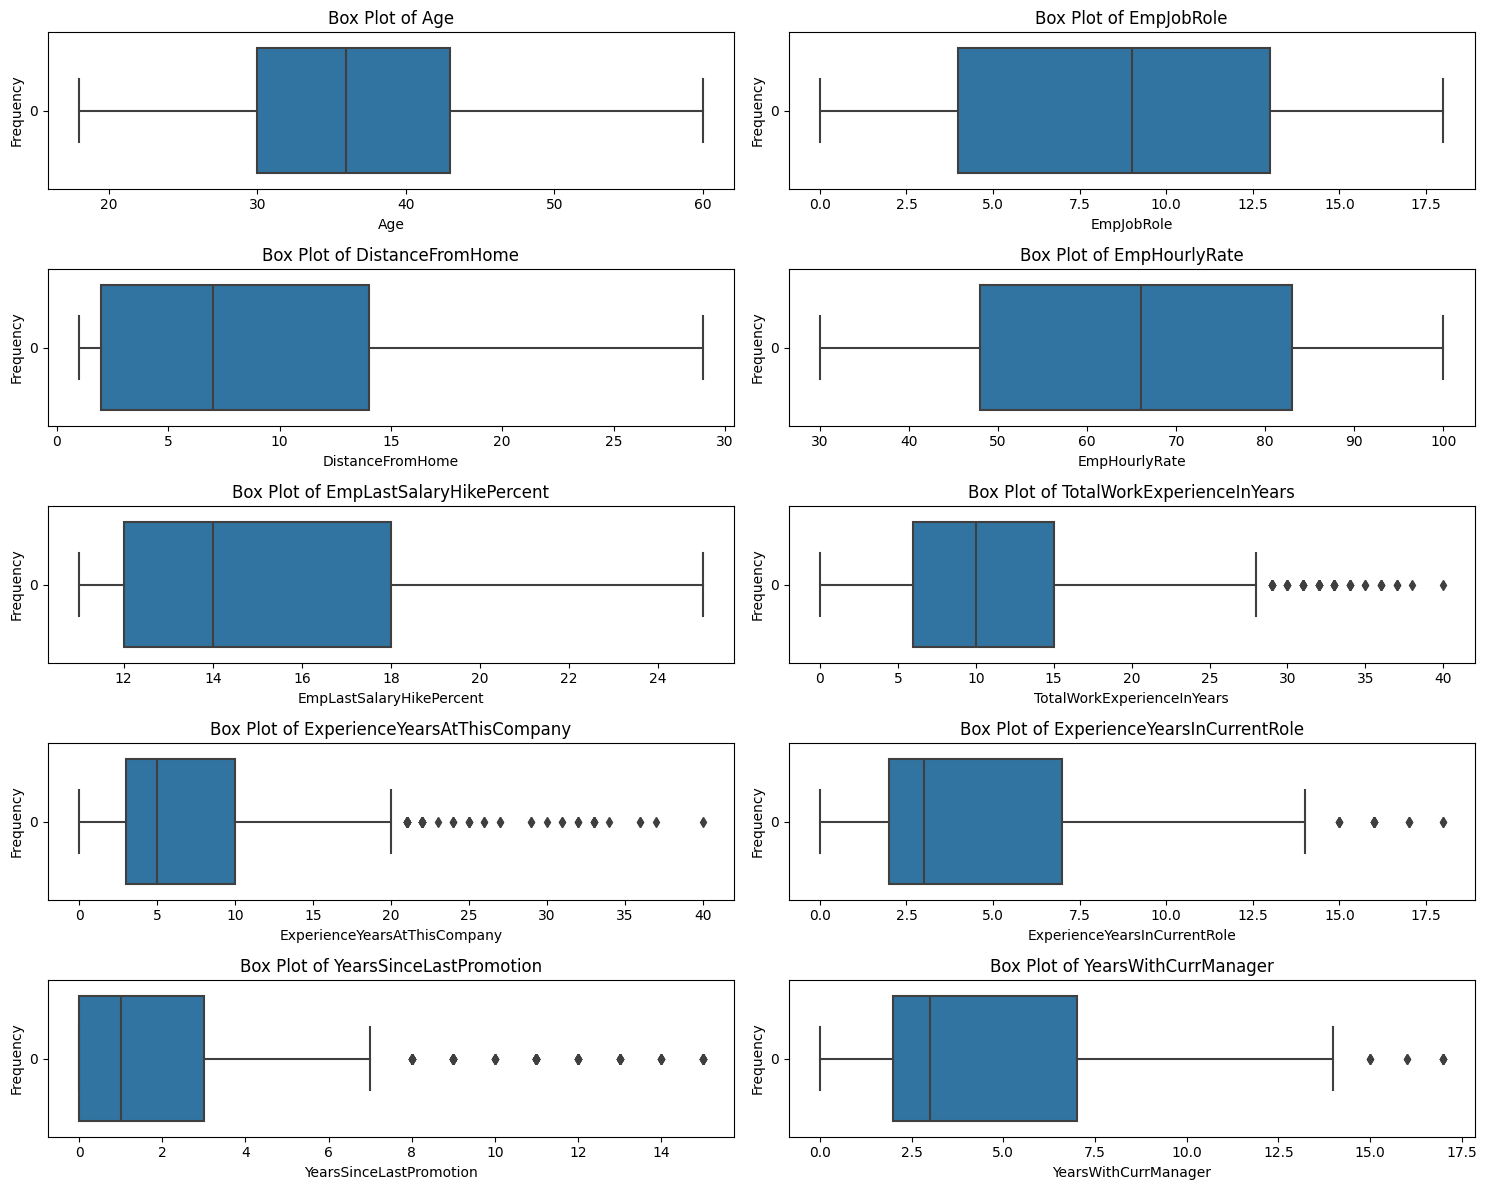

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
axes = axes.flatten()
plotnumber = 1


for  col in [col for col in data.columns if data[col].nunique() > 10 ]:
    plt.subplot(5, 2,plotnumber)
    sns.boxplot(data[col], orient='h')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Box Plot of {col}')
    plotnumber +=1


# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

***There are many columns which contains lots of outliers present in the dataset and need to be removed***

In [20]:
# This function impute median values to lower and upper bound if outliers present in dataset
def impute_outliers_iqr(df, multiplier=1.5):
   

    # Create a copy of the input DataFrame to avoid modifying the original data
    df_imputed = df.copy()

    
    
    # Calculate the IQR for the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Identify outliers before imputation
    outliers_before = (data[col] < lower_bound) | (data[col] > upper_bound)
    num_outliers_before = outliers_before.sum()

    # Impute outliers with the median (you can choose a different imputation strategy)
    data.loc[outliers_before, col] = data[col].median()

    # Identify outliers after imputation
    outliers_after = (data[col] < lower_bound) | (data[col] > upper_bound)
    num_outliers_after = outliers_after.sum()

    # Print the number of outliers before and after imputation
    print(f"{col}: Outliers before imputation: {num_outliers_before}, After imputation: {num_outliers_after}")
    print('-------'*5)

    return df_imputed



In [21]:
for  col in [col for col in data.columns if data[col].nunique() > 10 ]:
    impute_outliers_iqr(data[col])

Age: Outliers before imputation: 0, After imputation: 0
-----------------------------------
EmpJobRole: Outliers before imputation: 0, After imputation: 0
-----------------------------------
DistanceFromHome: Outliers before imputation: 0, After imputation: 0
-----------------------------------
EmpHourlyRate: Outliers before imputation: 0, After imputation: 0
-----------------------------------
EmpLastSalaryHikePercent: Outliers before imputation: 0, After imputation: 0
-----------------------------------
TotalWorkExperienceInYears: Outliers before imputation: 51, After imputation: 0
-----------------------------------
ExperienceYearsAtThisCompany: Outliers before imputation: 56, After imputation: 0
-----------------------------------
ExperienceYearsInCurrentRole: Outliers before imputation: 16, After imputation: 0
-----------------------------------
YearsSinceLastPromotion: Outliers before imputation: 88, After imputation: 0
-----------------------------------
YearsWithCurrManager: Ou

***Now we can say that no outlier are present in the dataset and imputed with iqr imputation method. We can also Use KNN Imputer Method also but right now for simplicity i have select IQR Imputation method***

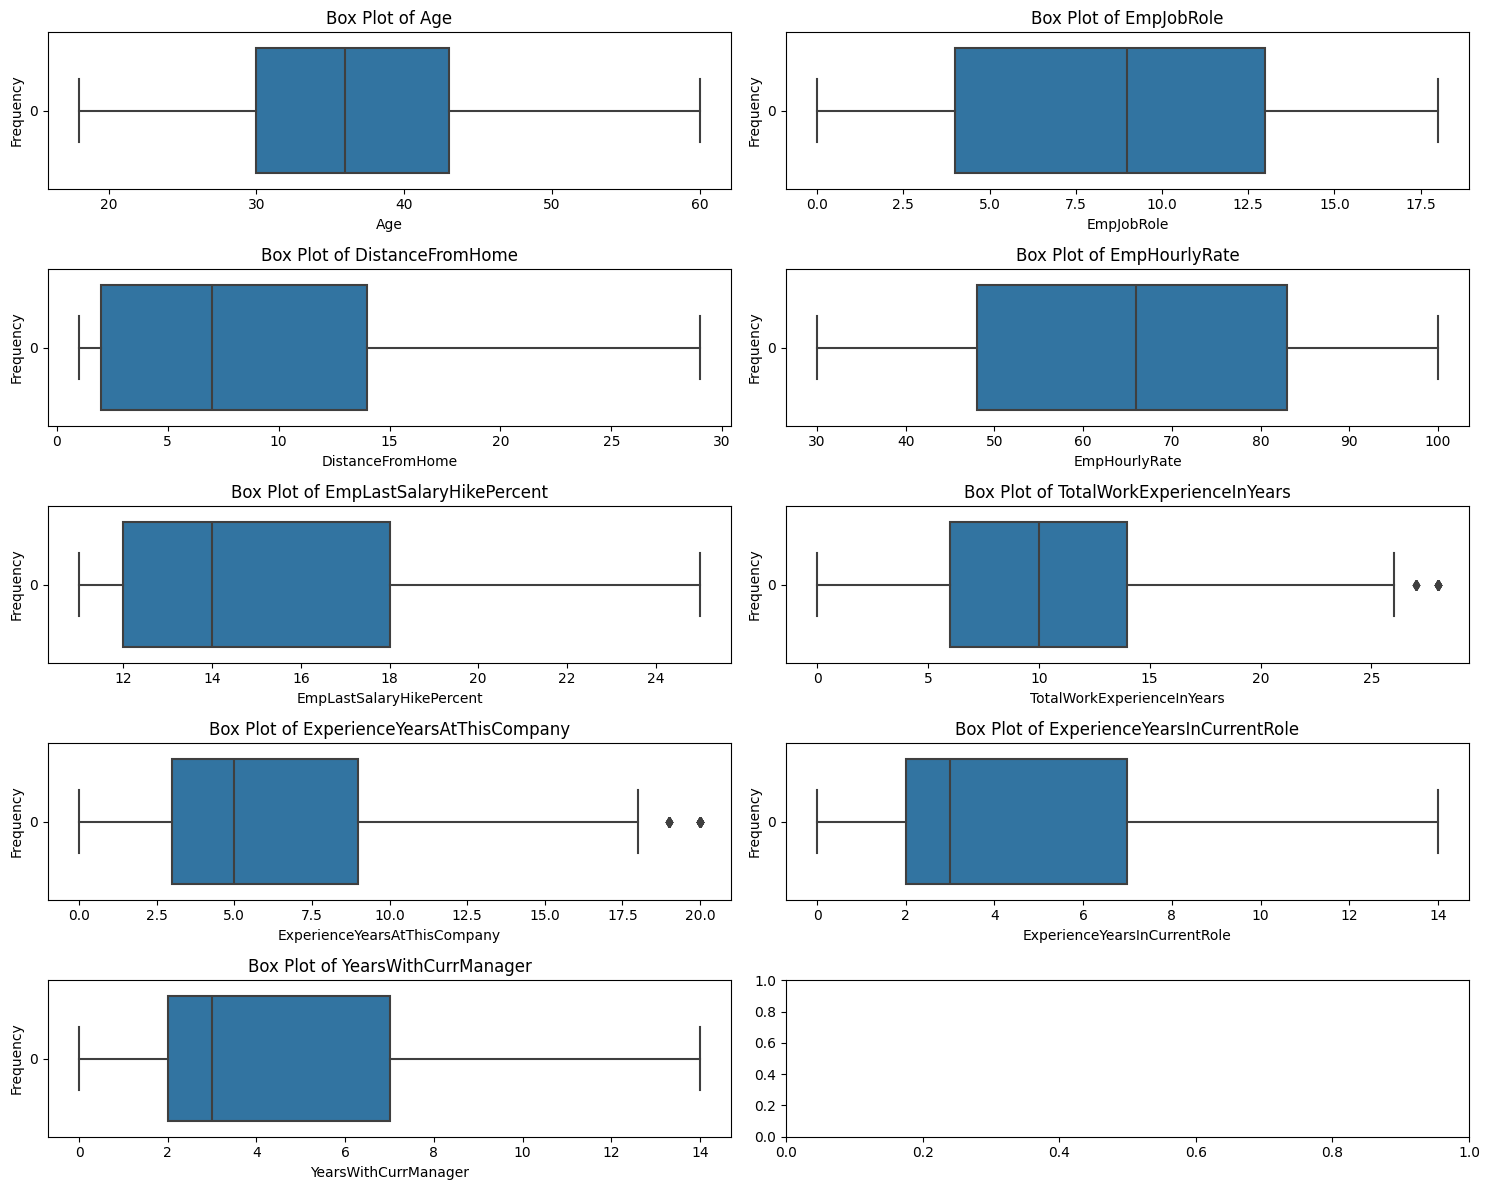

In [22]:
# plotting the box plot after the imputation
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
axes = axes.flatten()
plotnumber = 1


for  col in [col for col in data.columns if data[col].nunique() > 11 ]:
    plt.subplot(5, 2,plotnumber)
    sns.boxplot(data[col], orient='h')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Box Plot of {col}')
    plotnumber +=1


# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## Normalising the distributions 

### Checking distribution of columns 

<Figure size 2000x3000 with 0 Axes>

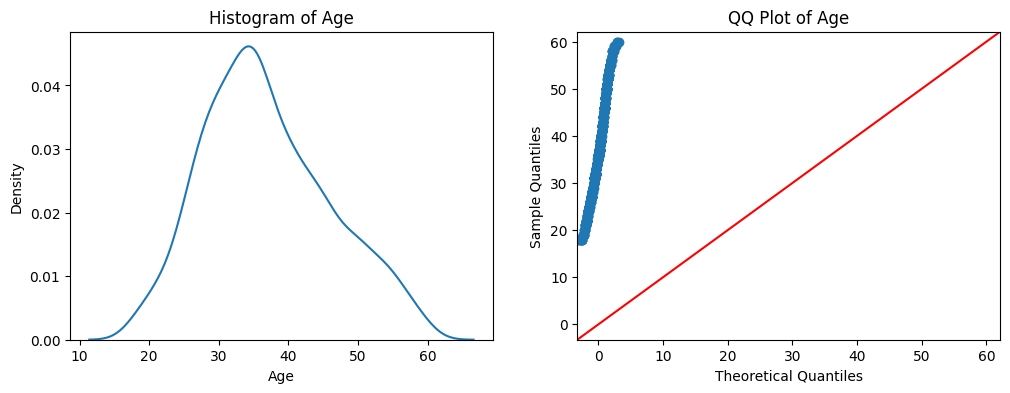

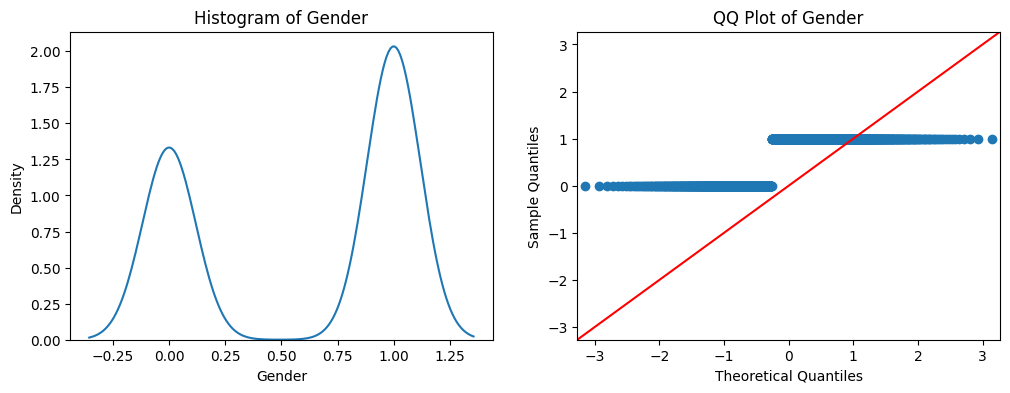

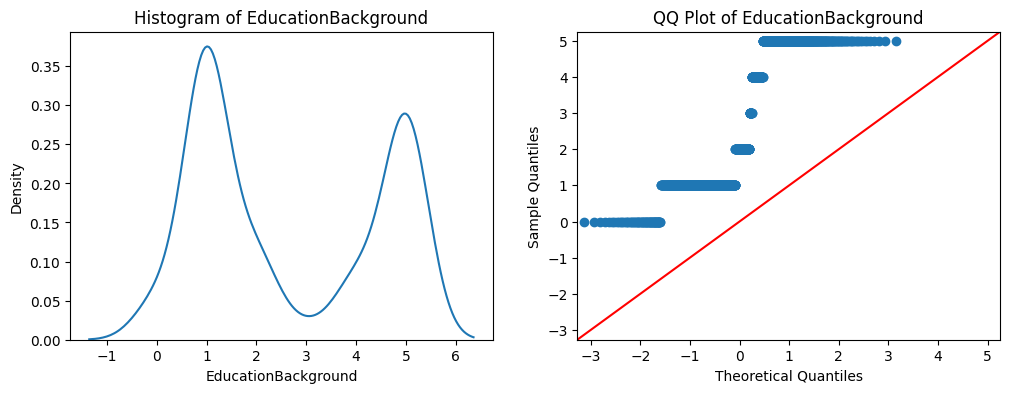

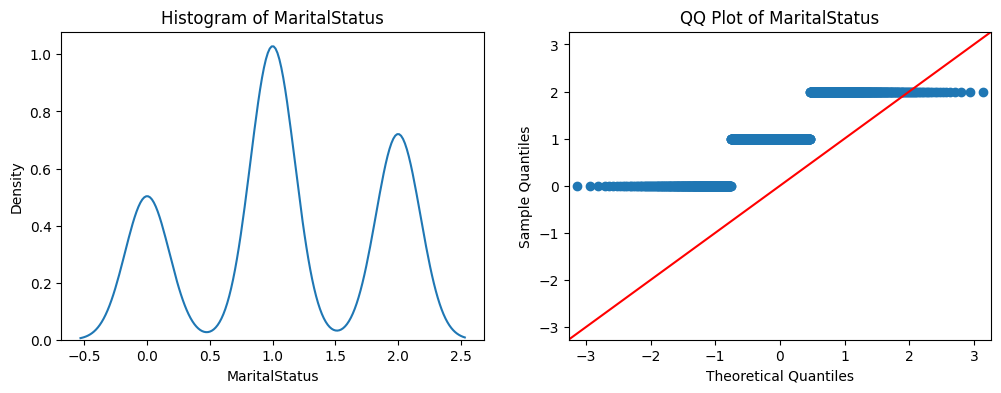

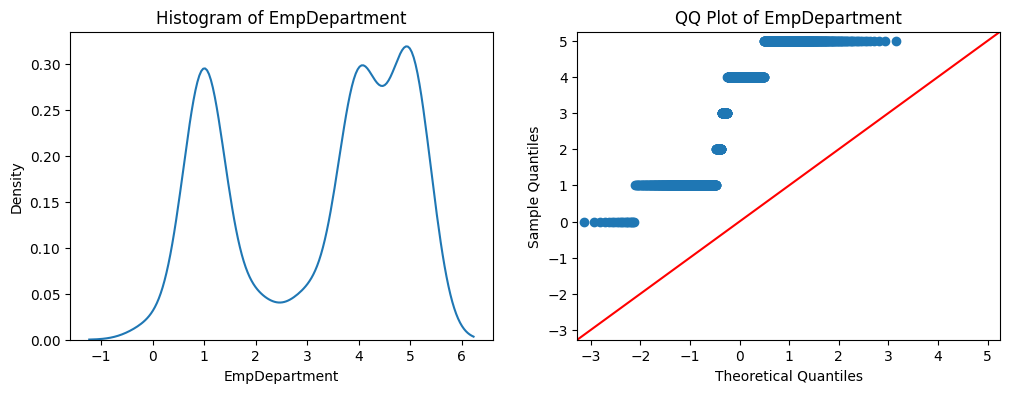

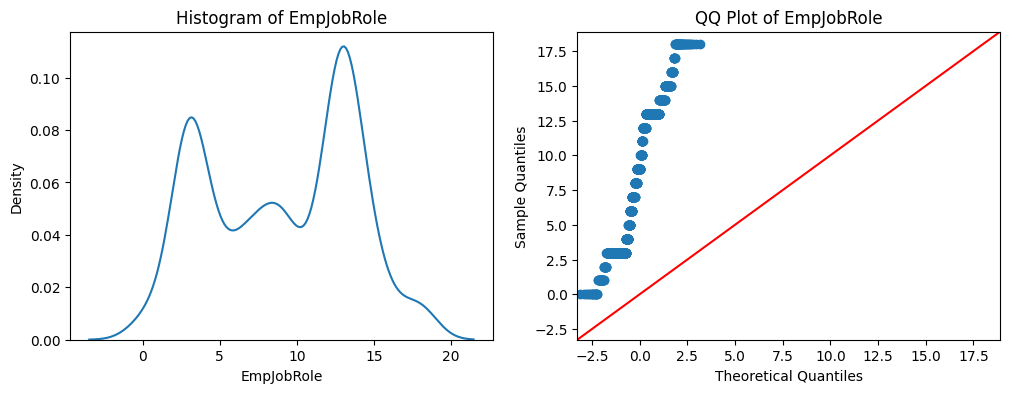

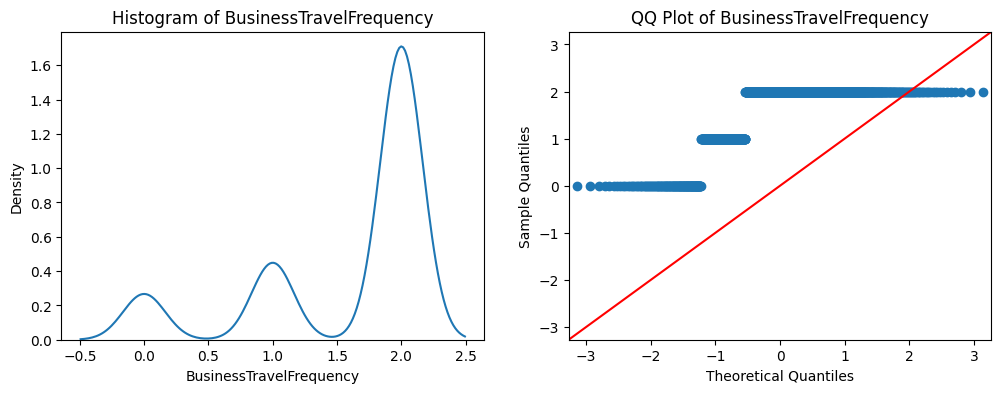

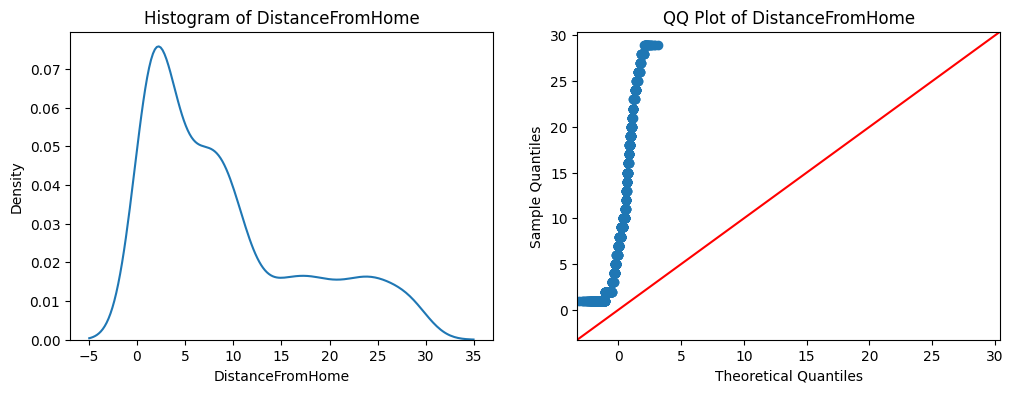

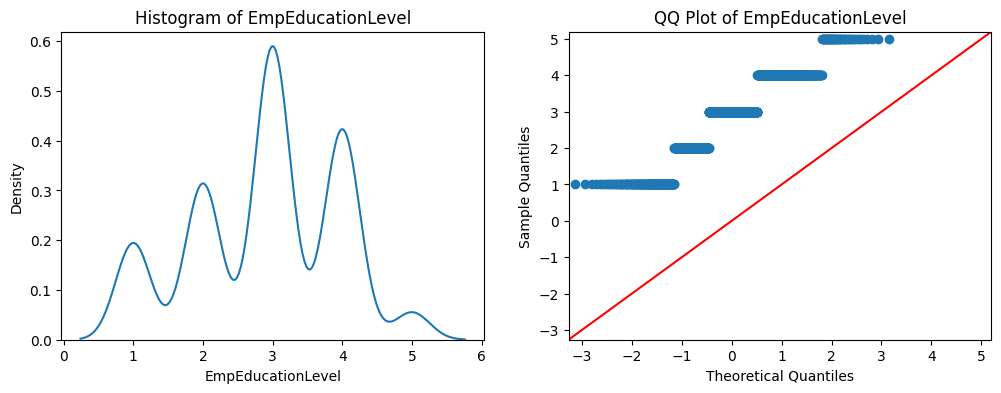

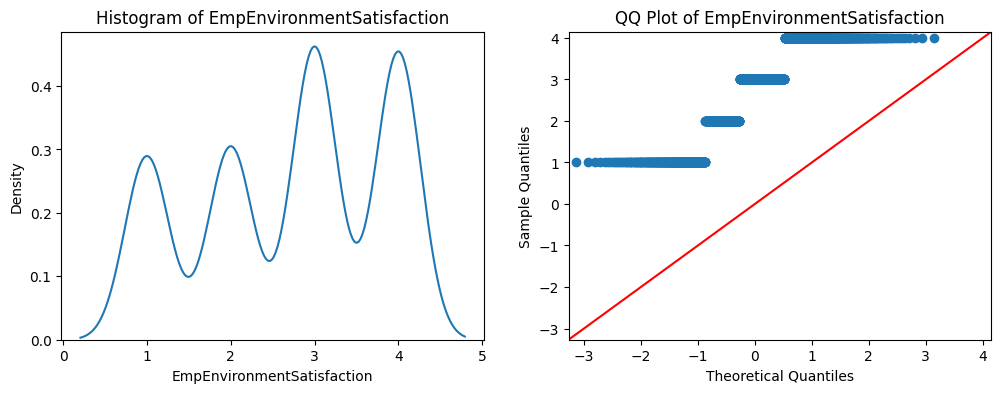

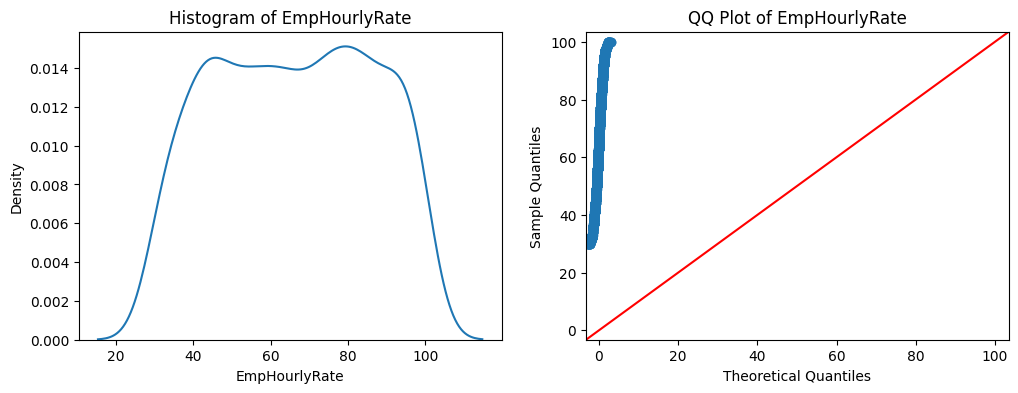

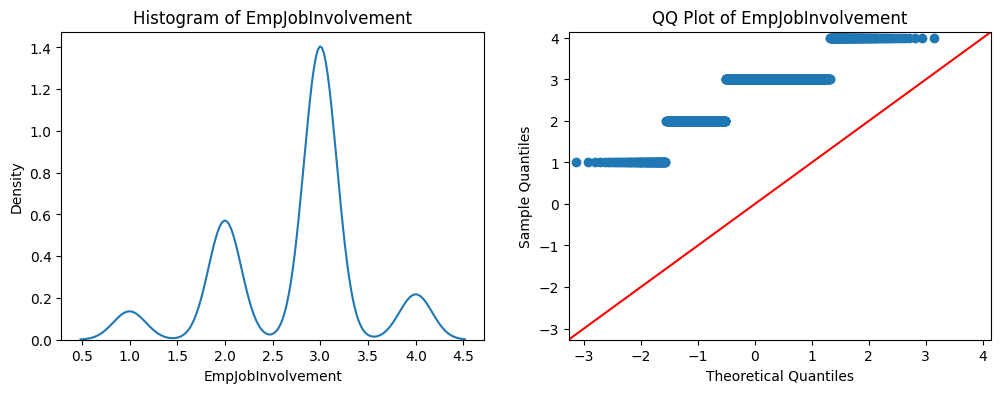

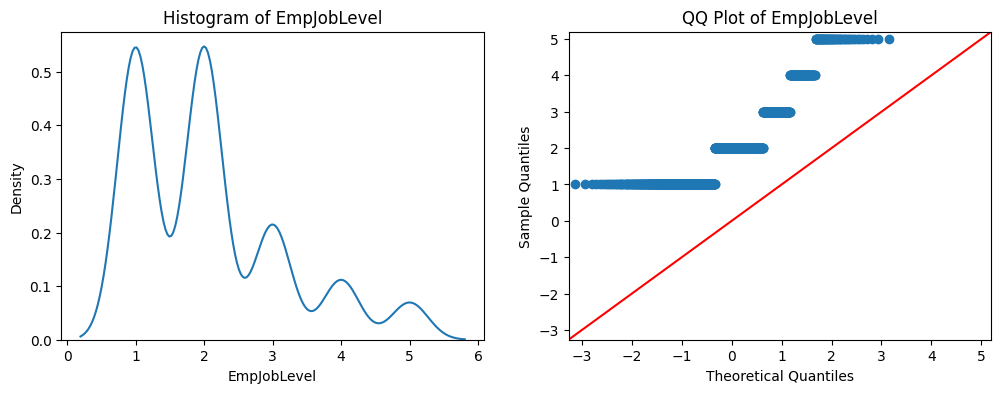

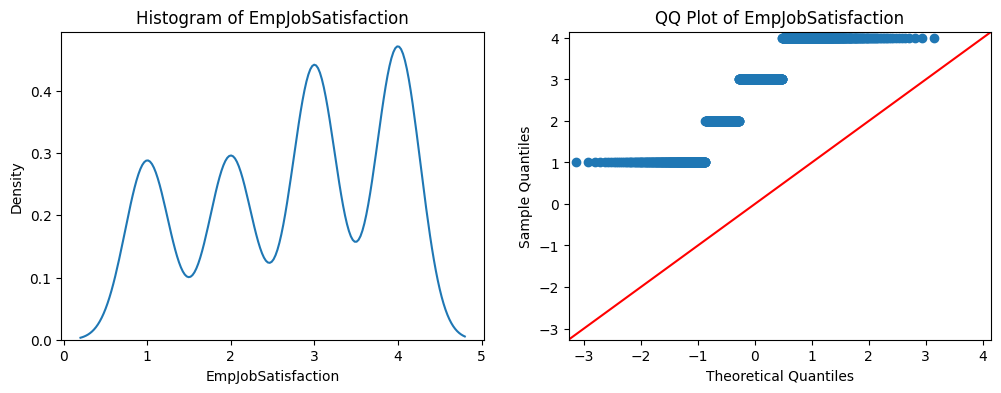

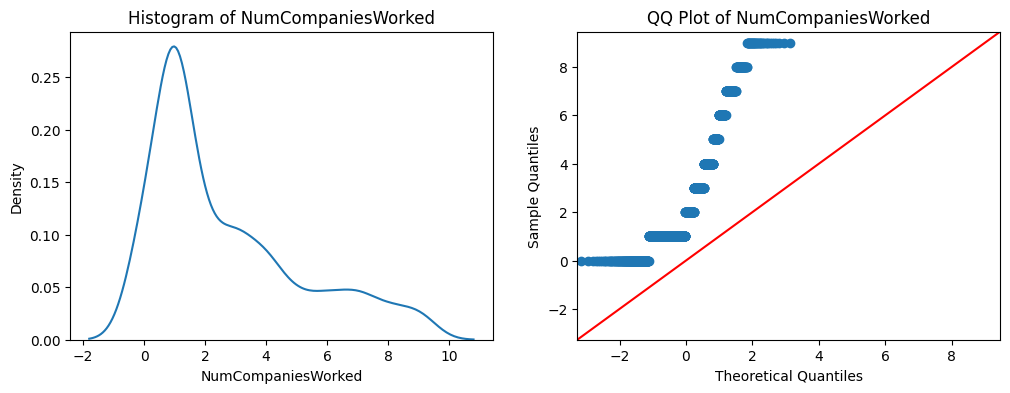

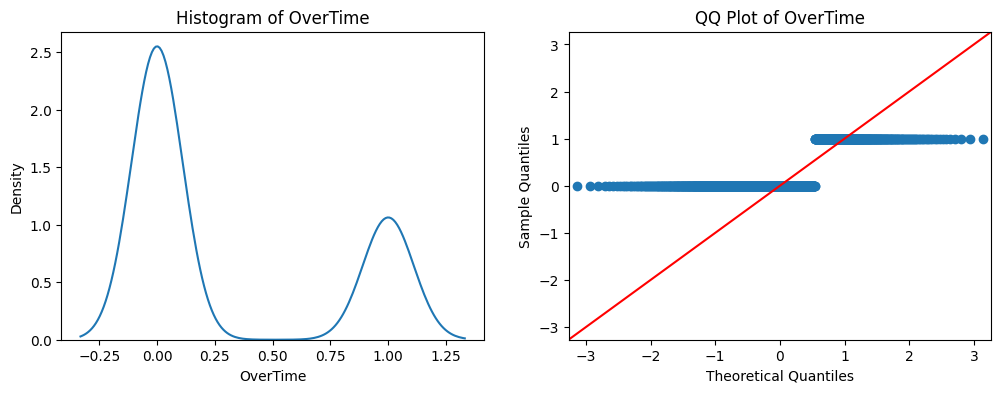

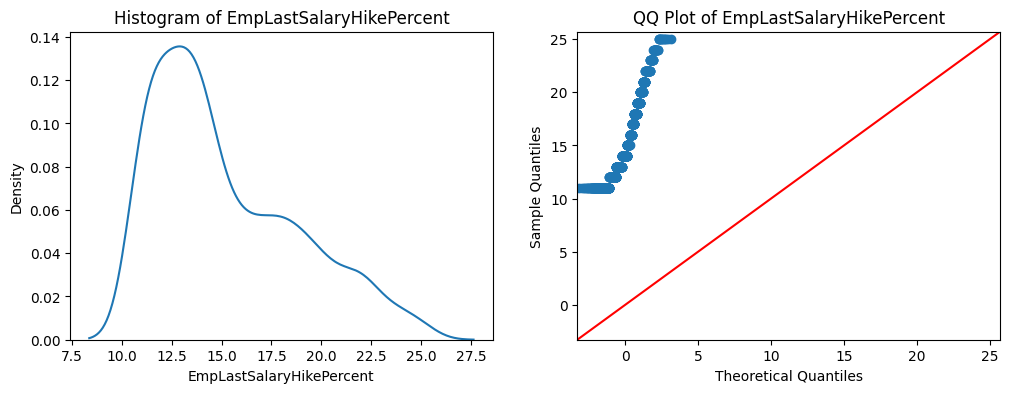

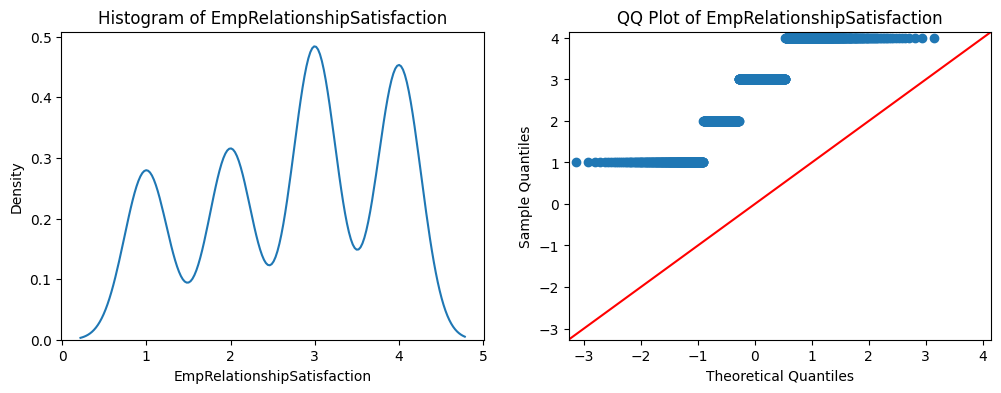

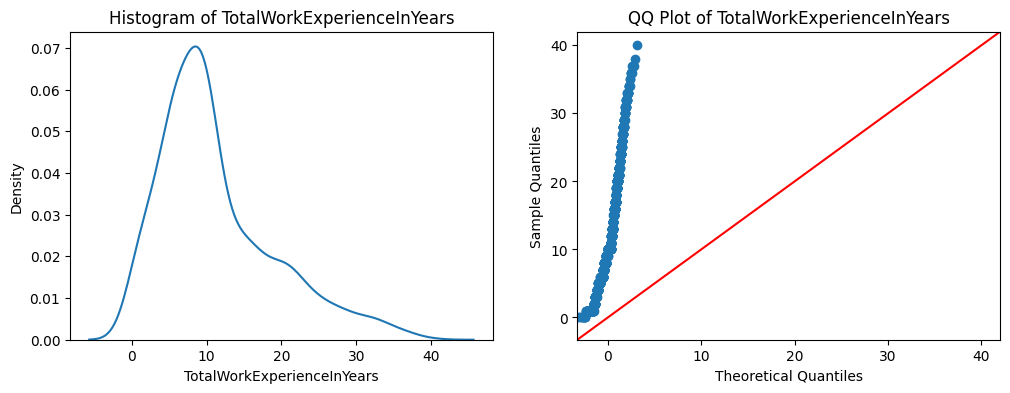

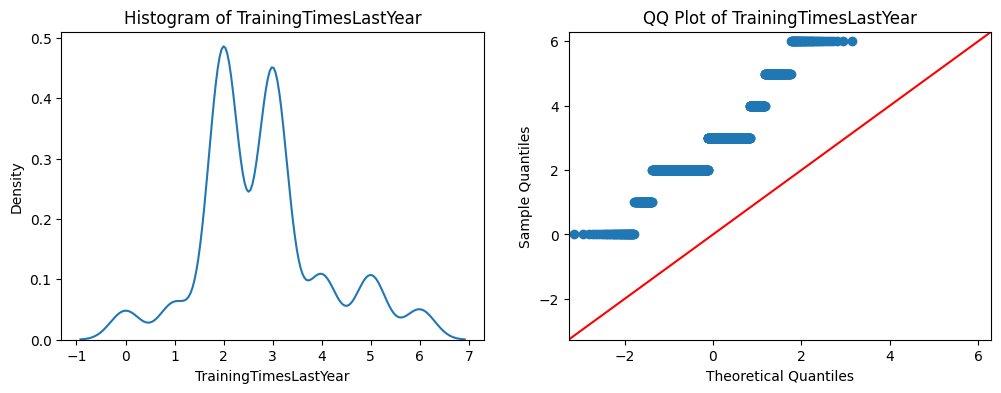

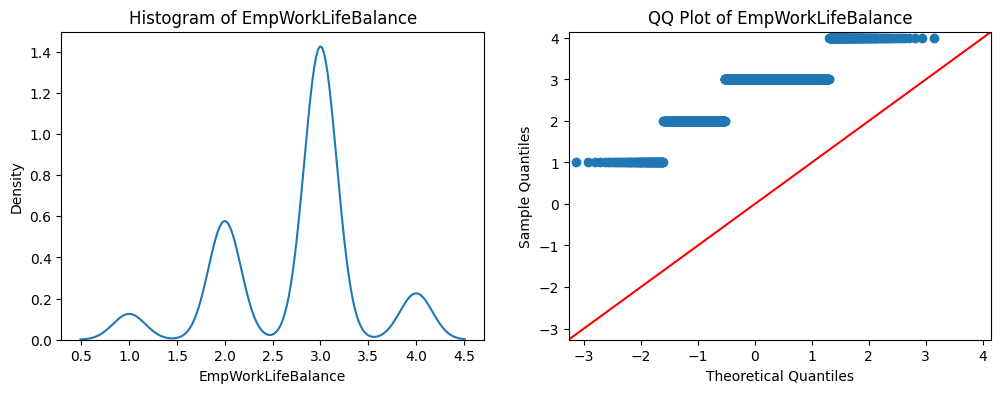

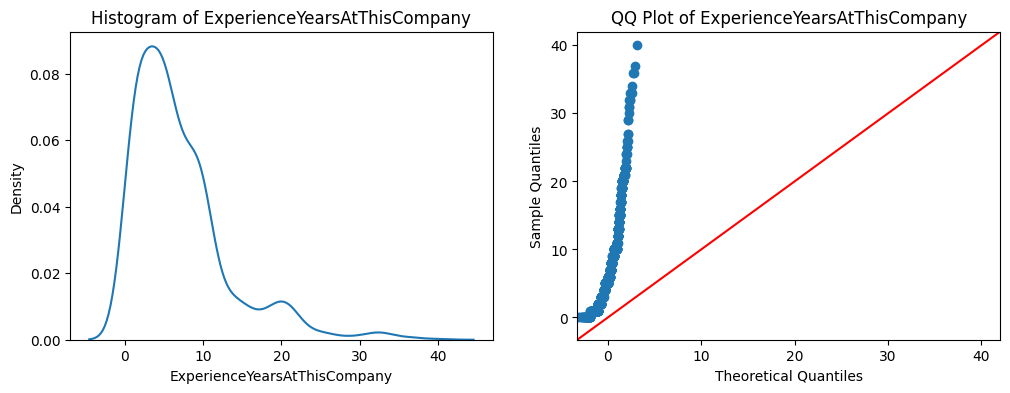

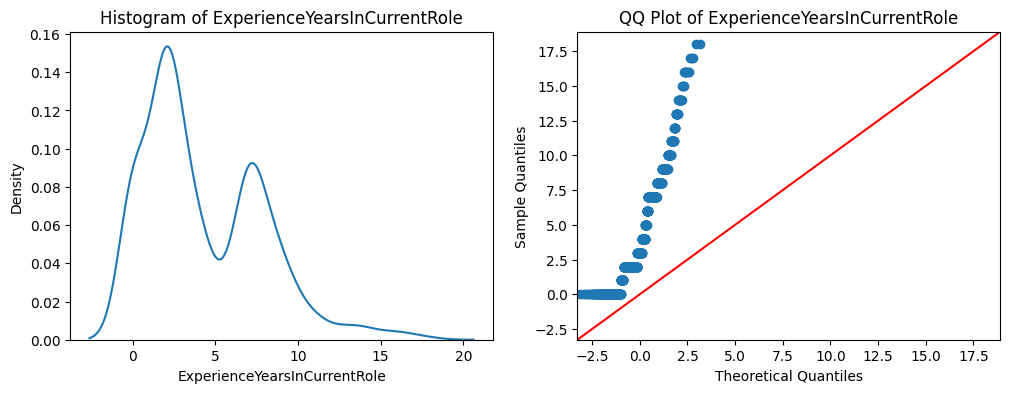

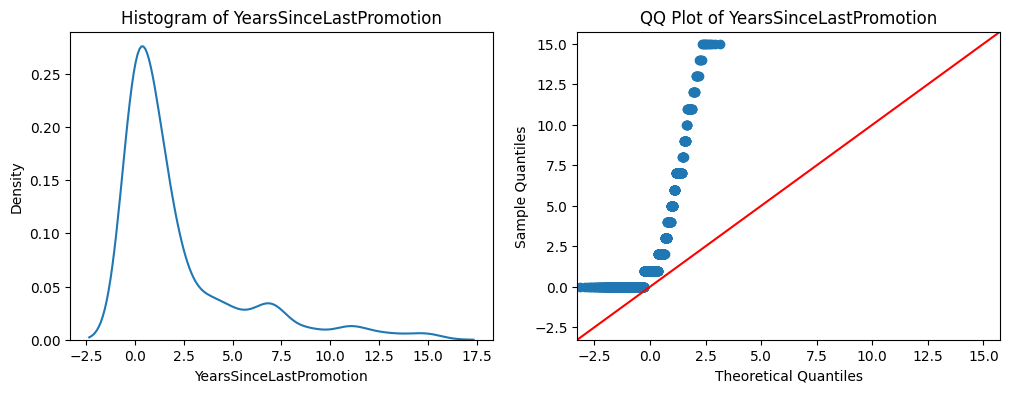

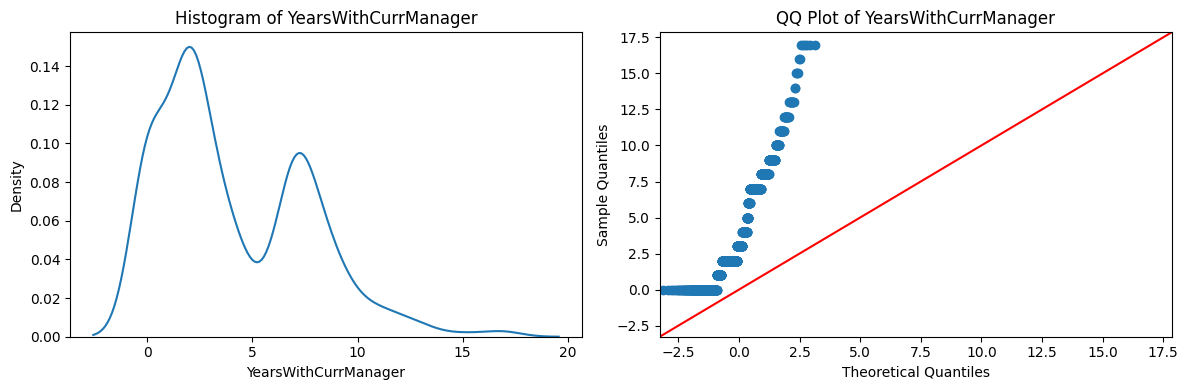

In [23]:
plt.figure(figsize=(20, 30))
plotnumber = 1

# Adjust the width space between subplots
plt.subplots_adjust(wspace=0.5)

for col in X.loc[:, :'YearsWithCurrManager']:
    plots, axis = plt.subplots(1, 2, figsize=(12, 4)) 

    # Plot the histogram
    sns.distplot(X[col], hist=False, kde=True, ax=axis[0])
    axis[0].set_title(f'Histogram of {col}')

    # QQ plot
    sm.qqplot(X[col], line='45', ax=axis[1])
    axis[1].set_title(f'QQ Plot of {col}')

    # Increment the plotnumber for the next subplot
    plotnumber += 1

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


***From the plot we can say that some of the columns are not normally distributed. So, for normalising the distribution we can use Log Transformation, Square root transformation, Power Transformation.***

In [24]:
col_trans = ['Age','EmpEducationLevel', 'EducationBackground', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance']  

In [25]:
col_to_trans = X[['Age','EmpEducationLevel', 'EducationBackground', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance']]

In [26]:
# Using the power transformation for  normalising the distributions
power_trans = PowerTransformer(method='yeo-johnson')
power_trans.fit(col_to_trans)
X[col_trans] = pd.DataFrame(power_trans.transform(col_to_trans), columns=col_to_trans.columns)


In [27]:
# saving the transformation model
joblib.dump(power_trans, '../../data/power_transform.joblib')

['../../data/power_transform.joblib']

In [28]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.480322,1,-0.118755,2,5,13,2,10,0.067029,1.214956,-0.519710,0.321309,2,1.189745,1,0,12,1.227297,10,-0.583798,-1.095649,10,7,0,8,0
1,1.101582,1,-0.118755,2,5,13,2,14,1.077199,1.214956,-1.194550,0.321309,2,-1.516392,2,0,12,1.227297,20,-0.583798,0.308417,7,7,1,7,0
2,0.416717,1,-0.823753,1,5,13,1,5,1.077199,1.214956,-0.879075,-1.072967,3,-1.516392,5,1,21,0.210158,20,-0.583798,0.308417,18,13,1,12,0
3,0.519554,1,0.408232,0,3,8,2,10,1.077199,-0.699014,0.369835,-1.072967,5,1.189745,3,0,15,-0.719083,23,-0.583798,-1.095649,21,6,12,6,0
4,2.199876,1,-0.118755,2,5,13,2,16,1.077199,-1.519967,0.893738,0.321309,2,-1.516392,8,0,14,1.227297,10,-1.494059,0.308417,2,2,2,2,0


### Checking the distributions after the Normalisation

<Figure size 2000x4000 with 0 Axes>

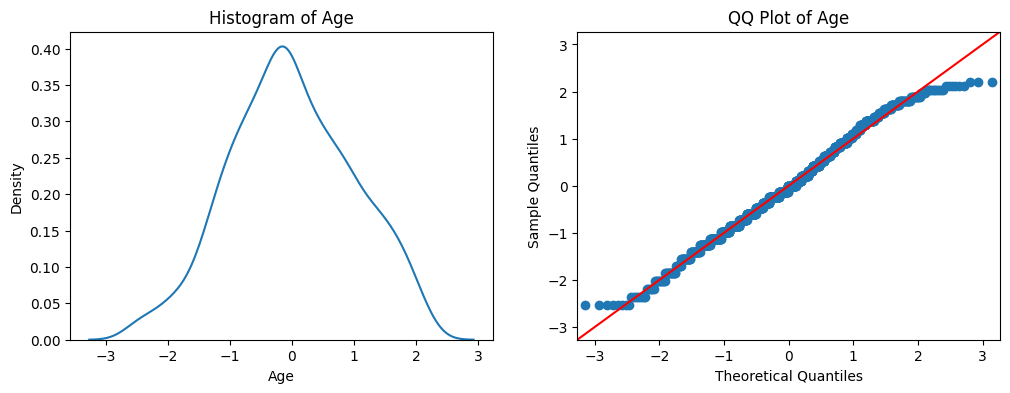

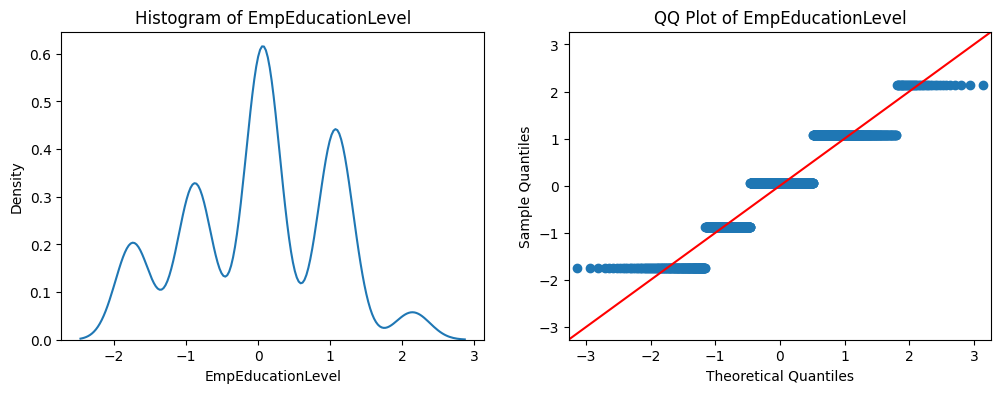

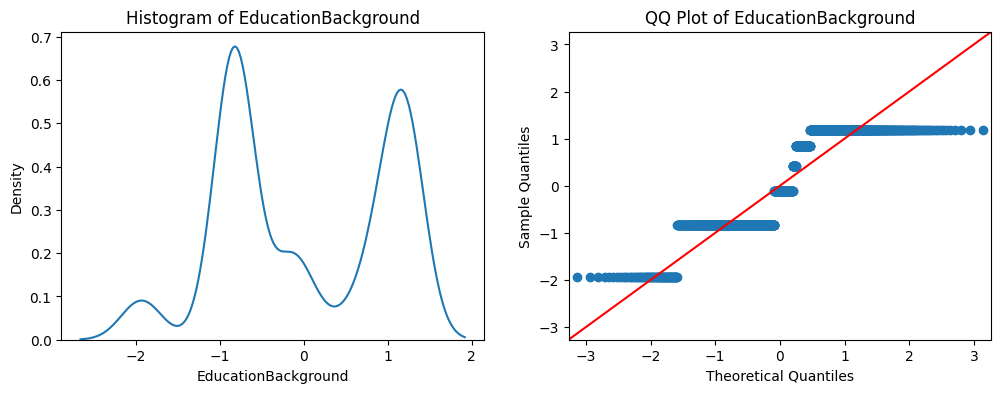

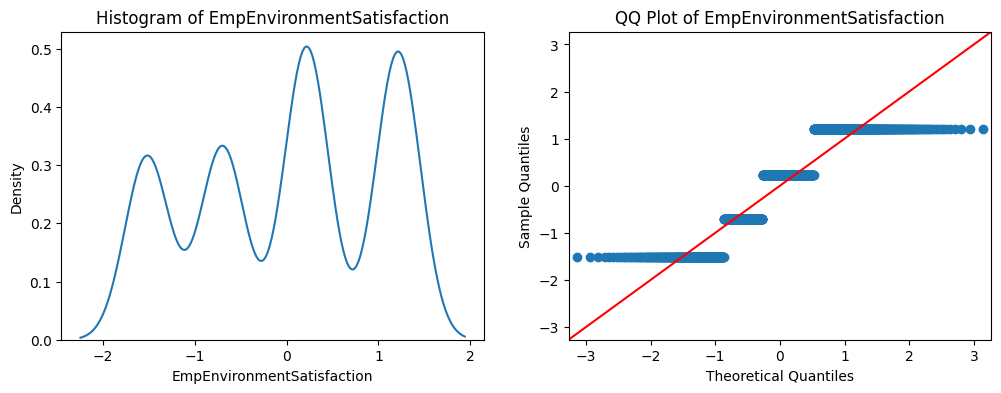

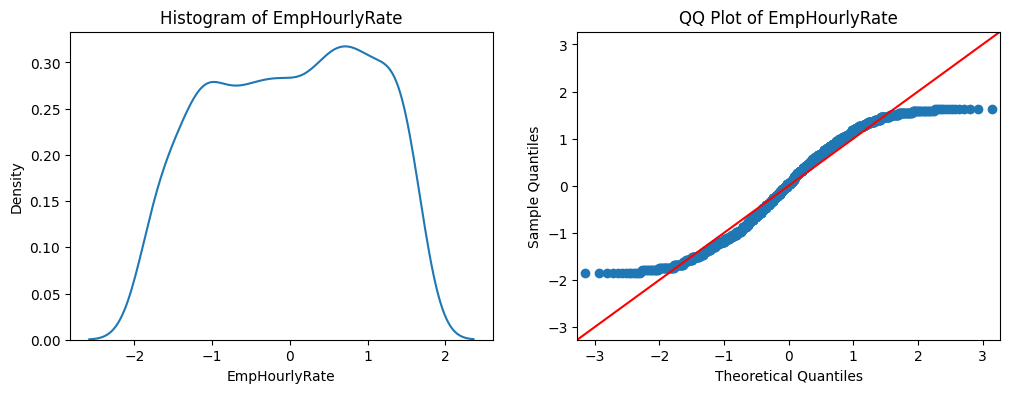

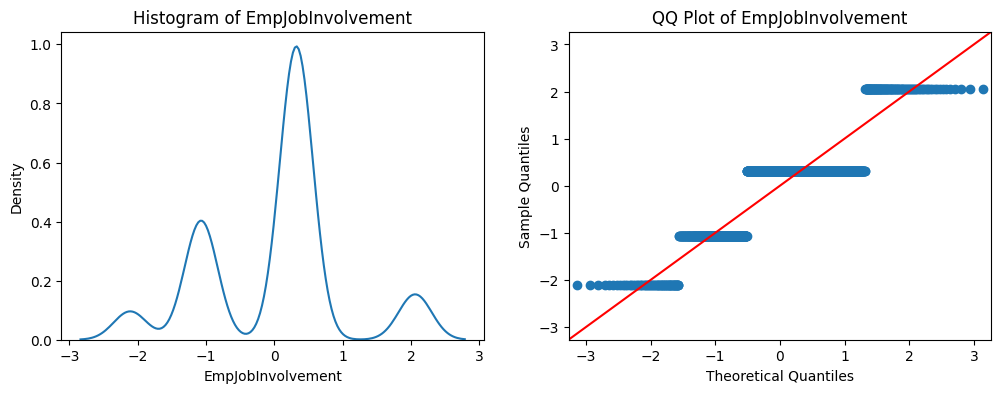

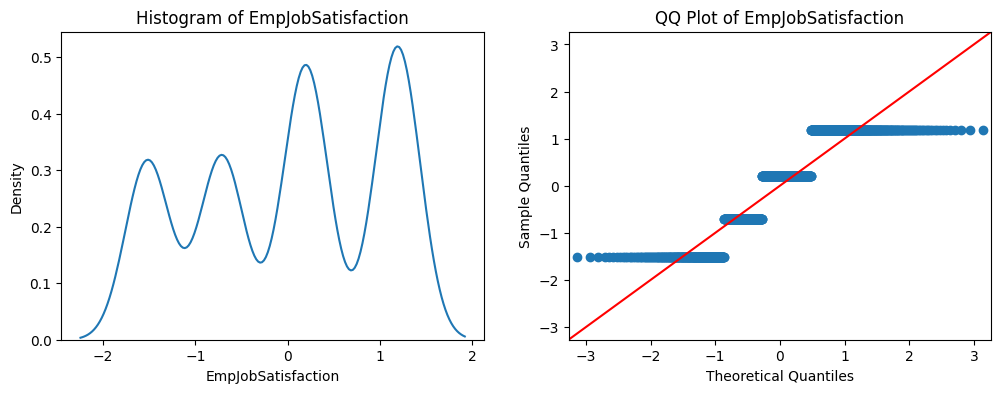

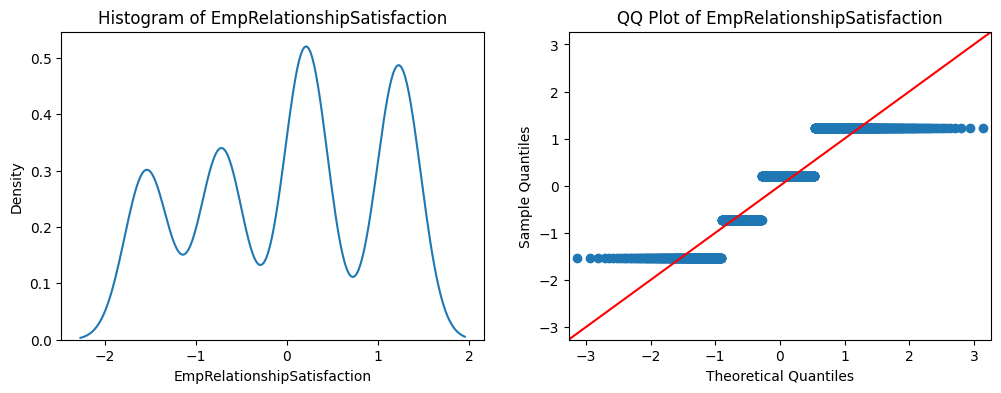

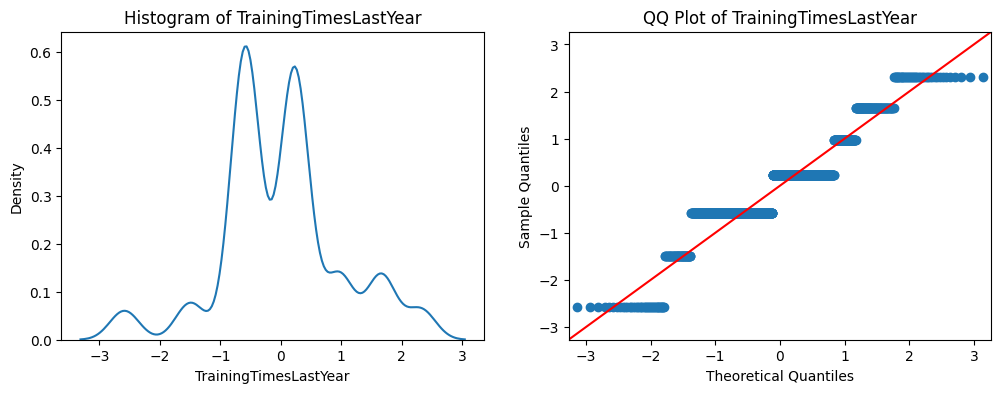

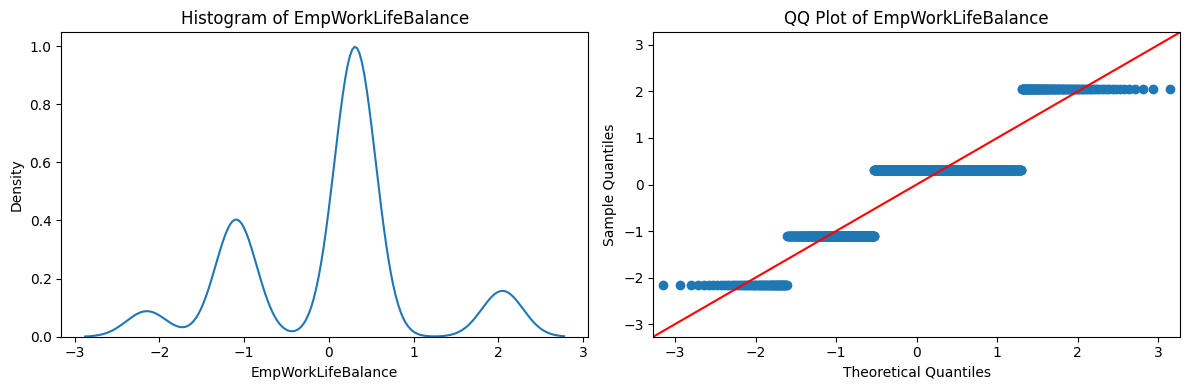

In [29]:
plt.figure(figsize=(20, 40))
plotnumber = 1

# Adjust the width space between subplots
plt.subplots_adjust(wspace=0.5)

for col in col_to_trans:
    plots, axis = plt.subplots(1, 2, figsize=(12, 4))  # Adjusted figsize for better visibility

    # Plot the histogram
    sns.distplot(X[col], hist=False, kde=True, ax=axis[0])
    axis[0].set_title(f'Histogram of {col}')

    # QQ plot
    sm.qqplot(X[col], line='45', ax=axis[1])
    axis[1].set_title(f'QQ Plot of {col}')

    # Increment the plotnumber for the next subplot
    plotnumber += 1

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


- ***Power Transformation was applied to the feature columns to normalise the data, as it is an effective method for this purpose.***
- ***The plot above shows that the distribution of the data is much more normalised after the Power Transformation than before.***

### Scaling the dataset

In [38]:
X

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.480322,1,-0.118755,2,5,13,2,10,0.067029,1.214956,-0.519710,0.321309,2,1.189745,1,0,12,1.227297,10,-0.583798,-1.095649,10,7,0,8,0
1,1.101582,1,-0.118755,2,5,13,2,14,1.077199,1.214956,-1.194550,0.321309,2,-1.516392,2,0,12,1.227297,20,-0.583798,0.308417,7,7,1,7,0
2,0.416717,1,-0.823753,1,5,13,1,5,1.077199,1.214956,-0.879075,-1.072967,3,-1.516392,5,1,21,0.210158,20,-0.583798,0.308417,18,13,1,12,0
3,0.519554,1,0.408232,0,3,8,2,10,1.077199,-0.699014,0.369835,-1.072967,5,1.189745,3,0,15,-0.719083,23,-0.583798,-1.095649,21,6,12,6,0
4,2.199876,1,-0.118755,2,5,13,2,16,1.077199,-1.519967,0.893738,0.321309,2,-1.516392,8,0,14,1.227297,10,-1.494059,0.308417,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.125499,0,1.190868,0,5,13,1,3,-1.738992,1.214956,0.273115,2.058960,2,1.189745,1,1,20,-0.719083,6,0.225757,0.308417,6,5,0,4,0
1196,0.096753,1,-0.823753,2,1,15,2,10,-0.877013,1.214956,0.704734,2.058960,1,1.189745,3,0,17,-1.542133,4,-0.583798,0.308417,1,0,0,0,0
1197,1.372772,1,1.190868,1,1,15,2,28,-1.738992,1.214956,0.418017,2.058960,1,0.195871,1,1,11,0.210158,20,0.225757,0.308417,20,8,3,8,0
1198,-0.242283,0,1.190868,2,0,1,2,9,0.067029,1.214956,-0.983413,-1.072967,3,-0.712132,1,0,14,-0.719083,9,0.225757,2.047638,8,7,7,7,0


In [39]:
scaler = StandardScaler()
scaled_arr = scaler.fit_transform(X)

In [40]:
# saving the scaling model
joblib.dump(scaler, '../../data/scaled.joblib')

['../../data/scaled.joblib']

In [41]:
X_scaled = pd.DataFrame(scaled_arr, columns=X.columns)
X_scaled

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.480322,0.809427,-0.118755,1.236181,1.052350,0.833426,0.596508,0.102061,0.067029,1.214956,-0.519710,0.321309,-0.060955,1.189745,-0.674538,-0.645573,-0.889111,1.227297,-0.170645,-0.583798,-1.095649,0.468778,0.749766,-0.681372,1.100251,-0.417335
1,1.101582,0.809427,-0.118755,1.236181,1.052350,0.833426,0.596508,0.591464,1.077199,1.214956,-1.194550,0.321309,-0.060955,-1.516392,-0.269410,-0.645573,-0.889111,1.227297,1.112397,-0.583798,0.308417,-0.012431,0.749766,-0.370834,0.817773,-0.417335
2,0.416717,0.809427,-0.823753,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.077199,1.214956,-0.879075,-1.072967,0.842082,-1.516392,0.945974,1.549010,1.594054,0.210158,1.112397,-0.583798,0.308417,1.752001,2.410786,-0.370834,2.230163,-0.417335
3,0.519554,0.809427,0.408232,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.077199,-0.699014,0.369835,-1.072967,2.648157,1.189745,0.135718,-0.645573,-0.061389,-0.719083,1.497310,-0.583798,-1.095649,2.233210,0.472929,3.045084,0.535296,-0.417335
4,2.199876,0.809427,-0.118755,1.236181,1.052350,0.833426,0.596508,0.836165,1.077199,-1.519967,0.893738,0.321309,-0.060955,-1.516392,2.161359,-0.645573,-0.337297,1.227297,-0.170645,-1.494059,0.308417,-0.814446,-0.634417,-0.060296,-0.594616,-0.417335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.125499,-1.235442,1.190868,-1.500751,1.052350,0.833426,-0.876351,-0.754394,-1.738992,1.214956,0.273115,2.058960,-0.060955,1.189745,-0.674538,1.549010,1.318147,-0.719083,-0.683861,0.225757,0.308417,-0.172834,0.196093,-0.681372,-0.029660,-0.417335
1196,0.096753,0.809427,-0.823753,1.236181,-1.305857,1.254260,0.596508,0.102061,-0.877013,1.214956,0.704734,2.058960,-0.963992,1.189745,0.135718,-0.645573,0.490425,-1.542133,-0.940470,-0.583798,0.308417,-0.974849,-1.188091,-0.681372,-1.159572,-0.417335
1197,1.372772,0.809427,1.190868,-0.132285,-1.305857,1.254260,0.596508,2.304373,-1.738992,1.214956,0.418017,2.058960,-0.963992,0.195871,-0.674538,1.549010,-1.165018,0.210158,1.112397,0.225757,0.308417,2.072807,1.026603,0.250242,1.100251,-0.417335
1198,-0.242283,-1.235442,1.190868,1.236181,-1.895409,-1.691577,0.596508,-0.020290,0.067029,1.214956,-0.983413,-1.072967,0.842082,-0.712132,-0.674538,-0.645573,-0.337297,-0.719083,-0.298949,0.225757,2.047638,0.147972,0.749766,1.492394,0.817773,-0.417335


### Feature Selection

<Axes: >

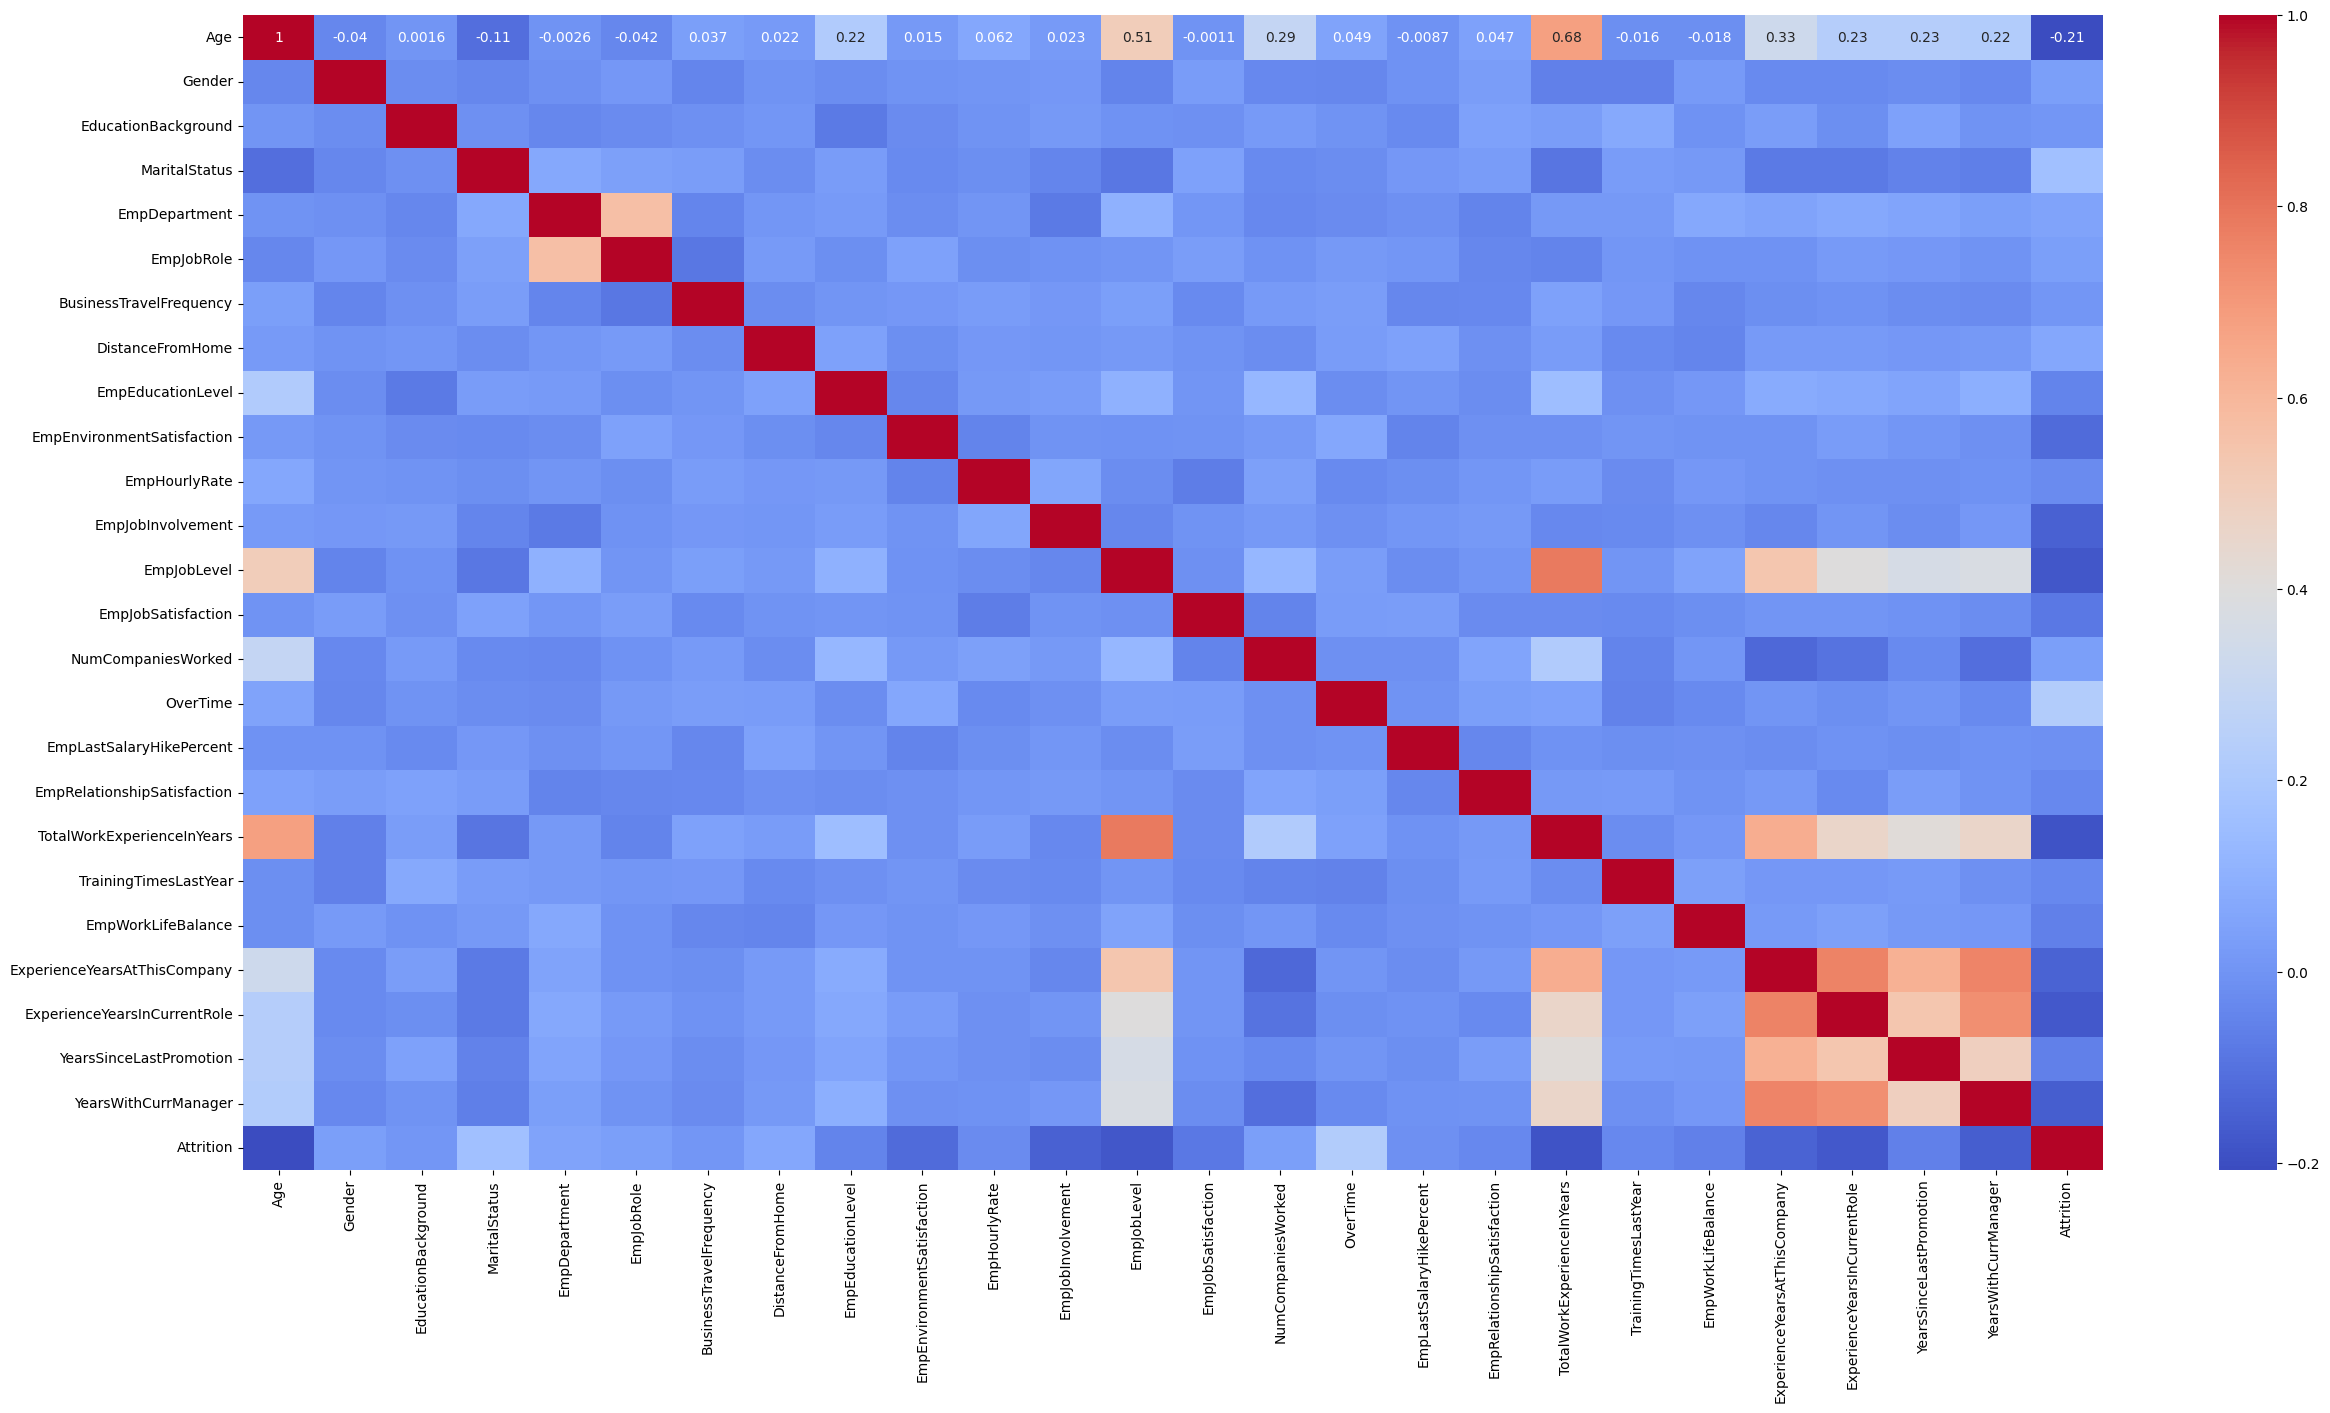

In [42]:
plt.figure(figsize=(30,15))

sns.heatmap(X_scaled.corr(), cmap= 'coolwarm', annot= True)

### Checking the high correlated columns 

In [43]:
# Calculate the correlation matrix
correlation_matrix = X_scaled.corr()

# Create a mask for the upper triangular part of the matrix
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Filter the DataFrame based on the mask
high_corr_columns = mask[mask > 0.80].stack().index.tolist()

# Display the columns with high correlation
print("Columns with high correlation (> 0.80):")
print(high_corr_columns)


Columns with high correlation (> 0.80):
[]


***We can check the correlation matrix of our data frame to see if there are any highly correlated features that might cause multicollinearity problems in our regression model. A common rule of thumb is to drop any features that have a correlation coefficient higher than 0.80 with another feature, as they are likely to be redundant and not add much explanatory power to the model. However, in our case, we do not have any columns that have a correlation higher than 0.80, so we do not need to drop any columns from our data frame. This means that all of our features are relatively independent and can be used in our regression analysis.***


### dropping down columns with high correlation

In [44]:
# X_scaled.drop(columns=['EmpDepartment_Finance', 'EmpJobRole_Human Resources', 'EmpJobRole_Sales Executive'], inplace= True)

### Principal Component Analysis

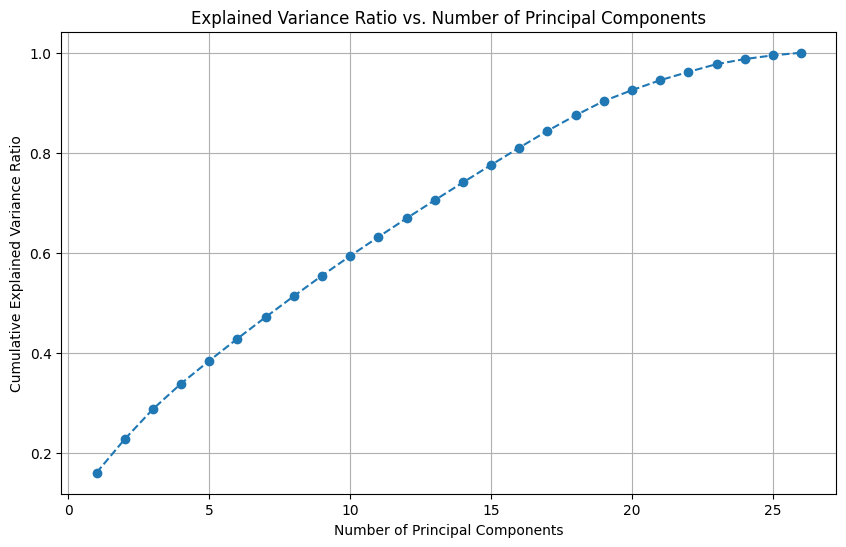

In [45]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculating the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [46]:
# Set the desired explained variance threshold, e.g., 95% or 99%
explained_variance_threshold = 0.95

# Find the number of components that satisfy the threshold
num_components_threshold = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1

print(f"Number of components needed to explain {explained_variance_threshold * 100}% variance: {num_components_threshold}")


Number of components needed to explain 95.0% variance: 22


In [47]:
pca = PCA(n_components=22)  
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the reduced dimensions
columns_pca = [f'PC{i}' for i in range(1, X_pca.shape[1] + 1)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns_pca)

# Concatenate the reduced dimensions with the original DataFrame
X_combined = pd.concat([X_scaled, X_pca_df], axis=1)

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio for Each Principal Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio for Each Principal Component:
[0.16050631 0.06693478 0.06011342 0.05105544 0.04562343 0.04424717
 0.04297428 0.04192487 0.04104324 0.03927894 0.03795737 0.03724881
 0.03622847 0.03549295 0.03501097 0.03451382 0.03365602 0.03095307
 0.02872269 0.02165725 0.01989684 0.01657792]


In [48]:
final_data = pd.concat([X_pca_df, y], axis= 1)
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PerformanceRating
0,0.404724,-1.566799,0.062776,-0.624920,0.341379,0.984227,0.171404,-0.022634,-0.351211,-2.460052,-0.194419,-1.402207,0.171402,-0.537098,-0.191197,0.798081,-0.306391,-0.163976,-0.309941,-0.521089,1.158880,-0.117845,3
1,1.321330,-0.261231,1.226169,-0.480346,-0.416642,0.251381,-0.215952,-0.328429,-1.016511,-1.136806,1.490257,-1.340151,-0.071941,-0.355752,0.878877,1.545028,-1.064916,-0.269057,-1.267522,-0.385328,0.488948,0.915439,3
2,3.455277,-1.107383,1.103412,0.460038,0.928282,0.829020,0.007258,0.425231,-1.211491,1.019294,1.695652,0.594718,1.564136,0.075772,0.962154,0.798312,0.551033,-0.987944,-0.501521,-2.206193,0.945774,-0.338291,4
3,4.282261,0.327870,-0.050691,0.376033,0.914926,-0.127428,0.014658,0.390216,0.048888,0.560772,-1.886256,-1.479117,-0.345806,0.029186,-0.243086,-0.504021,0.546722,-0.985781,0.483801,1.668945,-1.161007,-1.429217,3
4,-0.130212,1.769232,2.960434,-0.198642,0.072143,-2.093763,-1.491856,-0.080168,-0.933596,-1.103752,0.011015,-0.560328,0.225960,-0.249758,0.213086,1.004729,-1.191812,-0.348876,-0.207522,-0.753639,-1.160292,0.950850,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.829629,-1.481192,-0.282000,-1.342671,0.399700,2.202587,-0.730946,-0.388194,2.150698,0.329710,-0.424847,2.983825,-0.089659,0.421134,0.088099,-0.204950,0.528068,0.160276,0.264070,0.092738,0.862103,-0.661257,4
1196,-2.448642,0.388947,0.113846,-1.645620,1.590839,0.397114,0.586942,-0.921674,-0.058193,-0.863360,-0.698893,0.749492,-0.576404,-0.647716,-0.039123,1.675223,0.718394,1.640619,0.481563,0.237540,-0.370665,0.951718,3
1197,2.155389,-0.313296,-1.188419,0.157223,0.327357,1.801355,-2.312534,-0.972433,1.168511,-1.095900,0.442639,0.431617,-2.135515,-1.356616,0.080881,0.860440,0.006061,1.235612,0.072662,-1.061093,0.022116,2.037015,3
1198,1.267451,0.300784,-2.404937,0.466083,-1.841104,-0.043451,1.935274,0.002555,-0.461878,0.916050,1.065801,0.421509,-1.144435,0.289015,-0.857004,1.868095,-0.509620,-0.388898,-0.339399,0.521157,-0.726510,-0.077506,3


In [49]:
# Save the PCA model
joblib.dump(pca, '../../data/pca_model.joblib')

['../../data/pca_model.joblib']

In [50]:
# save the processed data
path = r'../../data/processed.csv'
final_data.to_csv(path, index=False )